In [2]:
import os 
import pandas as pd
from bs4 import BeautifulSoup
import pickle
#

In [ ]:
target_dir = r'C:\Users\Timot\Documents\plos_data'

The first bit of code here is for taking a large set of xml documents from the AllofPLoS corpus and parsing them for important information. Here I am only taking 10,000 of the documents, and I am only extracting the article title, the journal title, the year it was published and the actual article contents. After the data is put into a dataframe I run a tokenizer and then a stemmer and save those additions to the original dataframe into their own dataframe. 

In [3]:
#This cells navigates to the target directory and then opens each file individually and then passes it through beautifulsoup. This for loop will be the heart of the program I use to parse all the documents and extract the important information from them. 

target_dir = r'C:\Users\Timot\Documents\/data/Data'
titles = []
journal_titles = []
file_names = []
bodies = []
years = []
text = []

count = 0


print("Searching Corpus...")

for file in (file for file in os.scandir(target_dir) if file.is_file() and not file.name.startswith('.')):
    file_names.append(file.name)
    with open(file.path) as f:

        soup = BeautifulSoup(f.read(), 'xml')
        
        b_temp = soup.body.find_all('p')
        for file in b_temp:
            text.append(file.text)
        bodies.append(''.join(text))
        text = []
        
        if soup.find('journal-title-group') == None:
            print('Error: no journal title')
            journal_titles.append('None')
        else:
            temp_journal = soup.find('journal-title')
            journal_titles.append(temp_journal.text)
    
        title_meta = soup.find('title-group')
        if title_meta.find_all('article-title') == '':
            print('Error: no title')
            titles.append('None')
        else:
            temp_titles = (title_meta.find('article-title'))
            titles.append(temp_titles.text)
        
        if soup.find('copyright-year') == None:
            print("Error: no copyright-year in file")
            years.append('None')
            print(file_names[count])
        else:
            temp_years = soup.find('copyright-year')
            years.append(temp_years.text)
    count = count+1
    if count == 1000:
        print('1000 complete...')
        print('Corpus Search Complete. Have a nice day.')
        break


Searching Corpus...
Error: no copyright-year in file
journal.pone.0116338.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0042258.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0045082.xml
Error: no copyright-year in file
journal.pone.0176408.xml
Error: no copyright-year in file
journal.pone.0131276.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0044895.xml
Error: no journal title
Error: no copyright-year in file
journal.pbio.1001391.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0040533.xml
Error: no copyright-year in file
journal.pone.0174943.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0046785.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0043824.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0044546.xml
Error: no journal title
Error: no copyright-year in file
journal.pone.0041701.xml
Error: no 

In [4]:
with open("journal_list.txt", "wb") as fp:  #saves list
    pickle.dump(journal_titles, fp)

with open("years_list.txt", "wb") as fp:  #saves list
    pickle.dump(years, fp)

with open("titles_list.txt", "wb") as fp:  #saves list
    pickle.dump(titles, fp)

with open("bodies_list.txt", "wb") as fp:  #saves list
    pickle.dump(bodies, fp)
    
with open('file-names_list.txt', 'wb') as fp:
    pickle.dump(bodies, fp)

In [9]:
with open("bodies_list.txt", "rb") as fp:
    bodies = pickle.load(fp)

with open("titles_list.txt", "rb") as fp:
    titles = pickle.load(fp)

with open ("years_list.txt", "rb") as fp:
    years = pickle.load(fp)
    
with open("journal_list.txt", "rb") as fp:
    journal_titles = pickle.load(fp)

In [8]:
print(bodies[4])

Labor represents a stress test for the fetus. Indeed, fetal hypoxia and asphyxia during labor constitute a possible cause of cerebral palsy and other neurological complications in childhood and adulthood[1]. Therefore, surveillance of the fetal wellbeing by intra-partum monitoring is of crucial importance. Analysis of fetal heart rate (fHR) recordings provides valuable information about the fetal homeostasis. In fact, fHR variability is an indirect mirror of an oxygenation and integrity of the autonomous nervous system[2], and can be altered by specific intrinsic or extrinsic stimuli. The uterine contractions (UC) generate transient reductions in utero-placental blood flow to the fetus, which represent a strong external stimulus to fetal homeostasis capable to modify fHR[3]. The inter-relationship between UC and fHR might provide important information about the functional status of fetal autonomous nervous system during labor. In the vast majority of deliveries, the intermittent hypoxi

In [5]:
plos_df = pandas.DataFrame({'Titles': titles, 'Article Contents': bodies, 'Journal Title' : journal_titles, 'Copyright Year' : years})

In [6]:
plos_df.to_pickle('../data/plos_sample.pk1') #saves


In [10]:
#loads dataframe
plos_df = pd.read_pickle('../data/plos_analysis/plos_sample.pk1')
plos_df

,Article Contents,Copyright Year,Journal Title,Titles
0,The study of animal communication is a complex...,2011,plos one,UV-Deprived Coloration Reduces Success in Mate...
1,Aneurysms in general represent a Damocles swor...,2017,plos one,Metabolomic profiling of ascending thoracic ao...
2,Prognostic information about life expectancy i...,2013,plos one,Predictive Value of a Profile of Routine Blood...
3,Interleukin (IL)-23 has been associated with t...,2017,plos one,Continuous IL-23 stimulation drives ILC3 deple...
4,Labor represents a stress test for the fetus. ...,2014,plos one,Assessment of Coupling between Trans-Abdominal...
5,Competition has long been recognized as a crit...,2014,plos one,Seaweed-Coral Interactions: Variance in Seawee...
6,There were errors in the legend of Figure 11. ...,2012,plos one,Correction: The Zinc Dyshomeostasis Hypothesis...
7,Phylogeographic studies leverage spatial and g...,2017,plos biology,A latitudinal phylogeographic diversity gradie...
8,Insulin-like Growth Factor-1 (IGF-1) is a pote...,2012,plos one,E-Peptides Control Bioavailability of IGF-1
9,Despite the expansive development of targeted ...,2014,plos one,Advancements in the Development of HIF-1α-Acti...


In [11]:
plosTokens = nltk.word_tokenize(plos_df['Article Contents'].sum())

In [13]:
#stems and normalizes the text. appending the data frame with them. plos_df['tokenized_text] is each document tokenized, so
#for me to replicate this I will have to go back and tokenize each document and create a list of those tokenized documents. 

plos_df['tokenized_text'] = plos_df['Article Contents'].apply(lambda x: nltk.word_tokenize(x))

plos_df['word_counts'] = plos_df['tokenized_text'].apply(lambda x: len(x))


In [14]:
plos_df['tokenized_text']

0      [The, study, of, animal, communication, is, a,...
1      [Aneurysms, in, general, represent, a, Damocle...
2      [Prognostic, information, about, life, expecta...
3      [Interleukin, (, IL, ), -23, has, been, associ...
4      [Labor, represents, a, stress, test, for, the,...
5      [Competition, has, long, been, recognized, as,...
6      [There, were, errors, in, the, legend, of, Fig...
7      [Phylogeographic, studies, leverage, spatial, ...
8      [Insulin-like, Growth, Factor-1, (, IGF-1, ), ...
9      [Despite, the, expansive, development, of, tar...
10     [Many, genetic, studies, of, complex, diseases...
11     [How, our, brains, acquire, stable, cognitive,...
12     [The, management, of, fragility, fractures, as...
13     [Lymphangiogenesis, is, the, process, that, fo...
14     [Novel, benzaldehyde, compounds, containing, b...
15     [Although, there, are, no, systematic, differe...
16     [According, to, the, definition, of, the, US, ...
17     [About, 10, %, of, the, 

## Corpus Linguistics
With the data cleaned and saved, the following code starts to do some rudimentary analysis of the corpus, suuch as word frequencies and parts of speech tags. 

In [24]:
#Counting words

In [4]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(plos_df['tokenized_text'].sum())


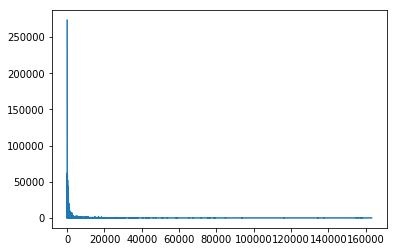

In [5]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

In [62]:
plosIndex = nltk.text.ConcordanceIndex(plos_df['tokenized_text'].sum())

In [64]:
plosIndex.print_concordance('findings')

Displaying 25 of 1435 matches:
, 10 ] .The central histological findings in non-syndromic ATAA analyses a
 pharmacy records and laboratory findings , and included stroke , myocardi
or this age group [ 23 ] , these findings are particularly important . How
ssment and CPSD analysis . These findings highlight the key importance of 
MPAs and adjacent non-MPAs , but findings may be useful for interactions o
r patterns , suggesting that our findings were not unduly affected by the 
orced protection in MPAs . These findings collectively support the hypothe
tions were most volatile . These findings reiterate that the lower genetic
g bioavailability of IGF-1 . Our findings that the interaction between E-p
iffer ( data not shown ) . These findings indicate that the posterior infe
value = 0.043 ) .Overall , these findings suggest that the expression leve
cture patients is similar to the findings obtained in animal models studie
e resorption-related genes . Our findings bring new insights for clar

In [18]:
print(countedWords[countedWords['word'] == 'credible'])
plosIndex.print_concordance('credible')

       count      word
53874     16  credible
Displaying 16 of 16 matches:
plants of 9.7 days/decade ( 95 % credible interval 12.1 to 7.3 , Appendix 
 distribution for means and 95 % credible intervals . We used non-informat
ese estimates have been the only credible outputs available to policy-make
mographic data will lead to more credible data for global estimates.Despit
rmed to yield estimates and 95 % credible intervals of the dynamic average
cated as solid lines , with 95 % credible intervals as dashed lines . The 
t ’ difference ( defined as 95 % credible interval for the difference betw
 provide an estimate of the 95 % credible interval for each trend . All es
nted as means with 95 % Bayesian credible intervals ( CI ) . Trends in bul
ror bars represent 95 % Bayesian credible intervals.Estimated number of sh
ror bars represent 95 % Bayesian credible intervals.Proportion of groups o
tance sampling methods with 95 % credible intervals shown in parentheses .
of estimates that will pr

In [17]:
countsDict = {}
for word in plos_df['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[(',', 263409),
 ('the', 244867),
 ('of', 182501),
 ('.', 182151),
 ('and', 150421),
 (')', 132756),
 ('(', 130729),
 ('in', 121161),
 ('to', 90668),
 ('a', 66654),
 (']', 61356),
 ('[', 61354),
 ('with', 52110),
 ('were', 49843),
 ('for', 48332),
 ('was', 43819),
 ('that', 40070),
 ('is', 36941),
 ('by', 34191),
 ('as', 30155),
 ('The', 28281),
 ('from', 26731),
 ('are', 24130),
 ('at', 23243),
 ('on', 22079),
 ('or', 20384),
 ('cells', 19458),
 ('%', 18935),
 ('be', 17181),
 (';', 17042),
 ('not', 16136),
 ('=', 14853),
 ('this', 13971),
 ('an', 13801),
 ('we', 13521),
 (':', 13518),
 ('1', 12968),
 ('using', 12542),
 ('which', 12372),
 ('between', 11652),
 ('In', 10617),
 ('have', 10500),
 ('Fig', 10360),
 ('2', 10165),
 ('used', 10006),
 ('also', 9297),
 ('expression', 9246),
 ('data', 9179),
 ('cell', 9126),
 ('each', 8977)]

In [18]:
#The stop list is then all words that occur before the first noun
#for the corpus as it is I think that the stop words should start with the noun 'disease'
stop_words_freq = []
for word, count in word_counts:
    if word == 'data':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()

In [19]:
#the following is the function that actually normalizes the tokens
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)


#this part of the code might look similar to what is done before but is actually different. 
#The previous code twas simply tokenizing the data, this is normalizing those tokens.
plos_df['normalized_tokens'] = plos_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

plos_df['normalized_tokens_count'] = plos_df['normalized_tokens'].apply(lambda x: len(x))

plos_df

,Article Contents,Copyright Year,Journal Title,Titles,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,The study of animal communication is a complex...,2011,PLoS ONE,UV-Deprived Coloration Reduces Success in Mate...,"[The, study, of, animal, communication, is, a,...",2239,"[studi, anim, commun, complex, scienc, address...",1055
1,Aneurysms in general represent a Damocles swor...,2017,PLOS ONE,Metabolomic profiling of ascending thoracic ao...,"[Aneurysms, in, general, represent, a, Damocle...",5547,"[aneurysm, gener, repres, damocl, sword, class...",2663
2,Prognostic information about life expectancy i...,2013,PLoS ONE,Predictive Value of a Profile of Routine Blood...,"[Prognostic, information, about, life, expecta...",4275,"[prognost, inform, life, expect, older, peopl,...",2011
3,Interleukin (IL)-23 has been associated with t...,2017,PLOS ONE,Continuous IL-23 stimulation drives ILC3 deple...,"[Interleukin, (, IL, ), -23, has, been, associ...",5091,"[interleukin, il, ha, associ, develop, sever, ...",2413
4,Labor represents a stress test for the fetus. ...,2014,PLoS ONE,Assessment of Coupling between Trans-Abdominal...,"[Labor, represents, a, stress, test, for, the,...",3149,"[labor, repres, stress, test, fetu, inde, feta...",1543
5,Competition has long been recognized as a crit...,2014,PLoS ONE,Seaweed-Coral Interactions: Variance in Seawee...,"[Competition, has, long, been, recognized, as,...",6629,"[competit, ha, long, recogn, critic, process, ...",3029
6,There were errors in the legend of Figure 11. ...,2012,PLoS ONE,Correction: The Zinc Dyshomeostasis Hypothesis...,"[There, were, errors, in, the, legend, of, Fig...",338,"[error, legend, figur, correct, figur, legend,...",169
7,Phylogeographic studies leverage spatial and g...,2017,PLOS Biology,A latitudinal phylogeographic diversity gradie...,"[Phylogeographic, studies, leverage, spatial, ...",11241,"[phylogeograph, studi, leverag, spatial, genet...",5706
8,Insulin-like Growth Factor-1 (IGF-1) is a pote...,2012,PLoS ONE,E-Peptides Control Bioavailability of IGF-1,"[Insulin-like, Growth, Factor-1, (, IGF-1, ), ...",5290,"[growth, potent, peptid, factor, involv, broad...",2492
9,Despite the expansive development of targeted ...,2014,PLoS ONE,Advancements in the Development of HIF-1α-Acti...,"[Despite, the, expansive, development, of, tar...",6722,"[despit, expans, develop, target, cancer, ther...",3053


In [20]:
#The data is now cleaned, tokenized and normalized. Saving dataframe so in the future I don't have to rerun all the lines above. 
#Remember to keep the two data frames seperate though. 
plos_df.to_pickle('../data/plos_normalized_sample.pk1') 

In [2]:
#loads dataframe
plos_df = pd.read_pickle('../data/plos_analysis/plos_normalized_sample.pk1')
#plos_df

In [8]:
#The following will be substantive analysis 
#.sum() adds together the lists from each row into a single list
plos_cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in plos_df['normalized_tokens'].sum()))

#print the number of words
print(plos_cfdist.N())

2767474


In [9]:
#distribution of different word lengths. the '.plot()' method provides a simple line graph but with so much data it is just an opaque group of words. 
plos_cfdist[9]

FreqDist({'seemingli': 41,
          'literatur': 450,
          'contribut': 1809,
          'increment': 187,
          'invertebr': 183,
          'compromis': 173,
          'molecular': 1395,
          'superfici': 69,
          'detriment': 79,
          'morpholog': 951,
          'treatment': 4843,
          'distribut': 2677,
          'unmanipul': 5,
          'interpret': 463,
          'broadleyi': 1,
          'behavoiur': 1,
          'intervent': 905,
          'hypertens': 333,
          'discoveri': 280,
          'technolog': 852,
          'therapeut': 423,
          'tricuspid': 21,
          'metabolom': 55,
          'innsbruck': 5,
          'metabolit': 372,
          'centrifug': 596,
          'autosampl': 11,
          'insuffici': 161,
          'quadrupol': 9,
          'darmstadt': 24,
          'arbitrari': 120,
          'similarli': 666,
          'metabolis': 7,
          'constitut': 478,
          'cytoplasm': 519,
          'hepatocyt': 253,
       

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(plos_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")

In [11]:
#the following cells have code that find meaningful collocations, starting with bigrams.
plosBigrams = nltk.collocations.BigramCollocationFinder.from_words(plos_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(plosBigrams.N))

There are 2767474 bigrams in the finder


In [12]:
#shows raw counts of 
def bigramScoring(count, wordsTuple, total):
    return count

print(plosBigrams.nbest(bigramScoring, 20))

[('wa', 'use'), ('thi', 'studi'), ('et', 'al'), ('wa', 'perform'), ('gene', 'express'), ('signific', 'differ'), ('cell', 'line'), ('wa', 'observ'), ('amino', 'acid'), ('wa', 'also'), ('statist', 'signific'), ('western', 'blot'), ('perform', 'use'), ('previou', 'studi'), ('express', 'level'), ('wa', 'determin'), ('data', 'shown'), ('wa', 'measur'), ('wa', 'significantli'), ('studi', 'wa')]


In [7]:
print(plosBigrams.nbest(bigramScoring, 40))

NameError: name 'plosBigrams' is not defined

In [15]:
#THis cell shows how the code that finds bigrams works. It doesn't treat them as strings but works with as numeric values, sort of like using the index position of the words as if they were in a list I think.This cell does not have to be inclded in a substantive analysis but is included for pedagogical reasons. 
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

plosBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  14939, The second word is: 3676
The first word is:  3676, The second word is: 1203
The first word is:  1203, The second word is: 2543
The first word is:  2543, The second word is: 361
The first word is:  361, The second word is: 502
The first word is:  502, The second word is: 788
The first word is:  788, The second word is: 2794
The first word is:  2794, The second word is: 622
The first word is:  622, The second word is: 4248
The first word is:  4248, The second word is: 73


In [22]:
#this cells starts to let me understand which bigrams are meaningful by using some measure to see if co-occurences are due to cahnce or not. 
bigram_measures = nltk.collocations.BigramAssocMeasures()
plosBigrams.score_ngrams(bigram_measures.student_t)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

#the values below are the results for a liklihood ratio test. need to understand what the actual output means and whether I can look at particular bigrams. 

[(('thi', 'studi'), 46.67073407194883),
 (('et', 'al'), 45.04721607013955),
 (('wa', 'perform'), 42.51112354725275),
 (('wa', 'use'), 41.3452638287134),
 (('gene', 'express'), 36.90299319753957),
 (('signific', 'differ'), 34.068291864221955),
 (('cell', 'line'), 31.809852196883806),
 (('amino', 'acid'), 31.276199464732507),
 (('western', 'blot'), 29.849050185878294),
 (('statist', 'signific'), 29.844182911857004),
 (('previou', 'studi'), 28.569462788316923),
 (('wa', 'observ'), 28.046974742109985),
 (('data', 'shown'), 27.7564223953227),
 (('express', 'level'), 27.262127635417578),
 (('perform', 'use'), 27.067591791450727),
 (('wild', 'type'), 26.813490830010657),
 (('previous', 'describ'), 26.579501647029943),
 (('present', 'studi'), 26.43701961757731),
 (('wa', 'determin'), 26.176567607889936),
 (('wa', 'also'), 25.75422192155731),
 (('wa', 'significantli'), 25.494631449069317),
 (('p', 'p'), 25.387098631402523),
 (('wa', 'measur'), 25.22906612682532),
 (('wa', 'calcul'), 24.52698428

In [17]:
#this shows the other measures that are available 
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

# Clustering and Topic Modeling

In [2]:
#load the dataframe with the normalized tokens appended.
plos_df = pd.read_pickle('../data/plos_normalized_sample.pk1')
#plos_df

In [29]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(plosTFVects.toarray())
reduced_data = pca.transform(plosTFVects.toarray())

Before doing any clustering it is first necessary to look at what number of clusters would be appropriate for the data and this requires using what is called the silhouette method, which is a method for measuring how well a piece of data fits into a cluster. The method will produce a score from -1 to +1 with higher values meaning a higher level of fit and lower less fit. 

In [30]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

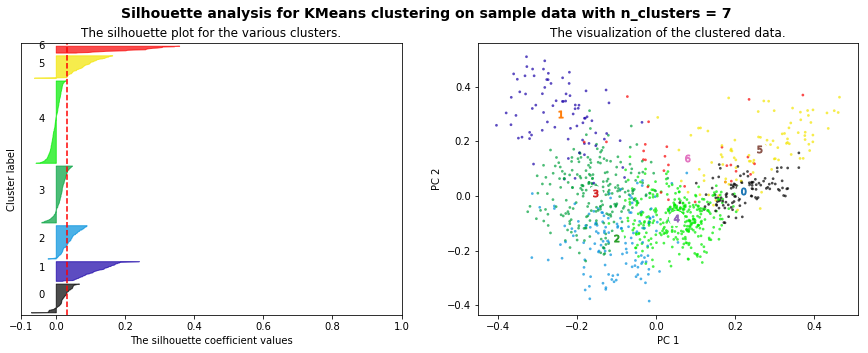

For n_clusters = 7, The average silhouette_score is : 0.032


In [88]:
X = plosTFVects.toarray()
plotSilhouette(7, X)

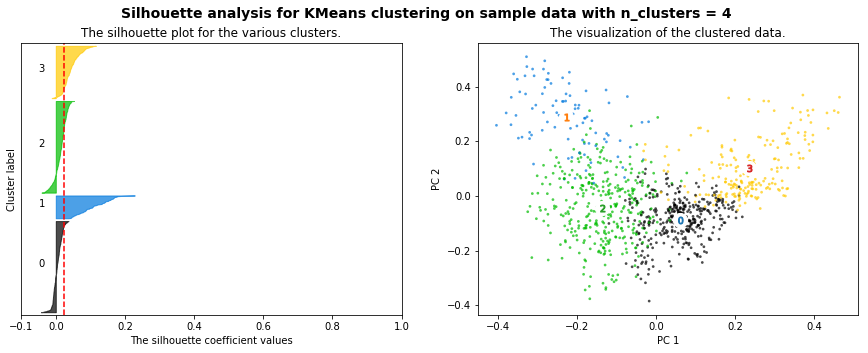

For n_clusters = 4, The average silhouette_score is : 0.024


In [32]:
X = plosTFVects.toarray()
plotSilhouette(9, X)

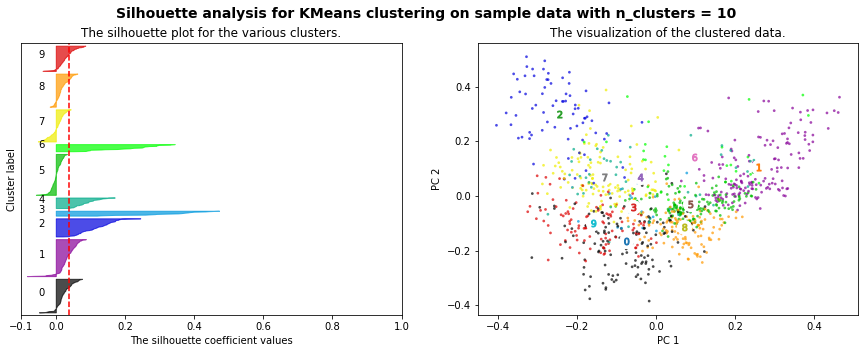

For n_clusters = 10, The average silhouette_score is : 0.040


In [90]:
X = plosTFVects.toarray()
plotSilhouette(10, X)

The silhouette cells above here should really go below many of the cells below here., as the coding infrastrucutre required to do the silhouette method is below here. Put the silhouette method cells immediately before the clustering is conducted below.

In [21]:
#This turns documents into word count vectors.
#The question is whether or not to use the raw words, or to use the tokenized words, or the stemmed words. 
#First it needs to be initialized
plosCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
plosVects = plosCountVectorizer.fit_transform(plos_df['Article Contents'])
print(plosVects.shape)

(1000, 85406)


In [22]:
plosVects

<1000x85406 sparse matrix of type '<class 'numpy.int64'>'
	with 1092777 stored elements in Compressed Sparse Row format>

In [23]:
#gets the indices of the word in the parantheses. Note that the value this gives is not a frequency, but a number associated with the words position in the sparse matrix
plosCountVectorizer.vocabulary_.get('reproducibility')

66708

In [24]:
#this allows for the use of tf-idf, which allows for document distinguishing, while excluding highly frequent words which are less meaningful in distinguishing between documents
#initialize
plosTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(plosVects)
#train
plosTF = plosTFTransformer.transform(plosVects)
print(plosTF.shape)

(1000, 85406)


In [25]:
#gives the tf-idf of each word
list(zip(plosCountVectorizer.vocabulary_.keys(), plosTF.data))[:10]
#for the values given for each word, the smaller the value the less informative that word is in the corpus, informative to what specifically I think is the ability to distinguish different documetns. 

[('the', 0.28064071392140805),
 ('study', 0.012036481335028035),
 ('of', 0.28742672458939356),
 ('animal', 0.0224640006872007),
 ('communication', 0.03735841890349157),
 ('is', 0.06666142334010972),
 ('complex', 0.006242023903057537),
 ('science', 0.010829491505036136),
 ('addressing', 0.014011877749229443),
 ('wide', 0.007561986280061522)]

In [26]:
#This 'prunes' the matrix, meaning it only leaves certain words based upon frequency and weighting, I think. 
#initialize
plosTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
plosTFVects = plosTFVectorizer.fit_transform(plos_df['Article Contents'])

In [27]:
plosVects


<1000x85406 sparse matrix of type '<class 'numpy.int64'>'
	with 1092777 stored elements in Compressed Sparse Row format>

In [28]:
#comparing this and the above cell it is easy to see what the tf-idf pruning is doing. It is limiting what words are going to be analyzed by their weights.
#Now there are 1000 words but the same amount of documents. 
plosTFVects

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 261095 stored elements in Compressed Sparse Row format>

In [22]:
#similar as to what was done above this allows us to see what a words indices are in the matrix, but thematrix is so much smaller now that the value given will be much smaller than the possible ones above. 
try:
    print(plosTFVectorizer.vocabulary_['studi'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(plosTFVectorizer.vocabulary_.keys())[:]))

vector is missing
The available words are: ['animal', 'complex', 'wide', 'signal', 'sensitivity', 'course', 'signaling', 'selection', 'wild', 'degree', 'quality', 'stable', 'early', 'work', 'suggested', 'status', 'cut', 'outcome', 'subsequent', 'social', 'absence', 'sufficient', 'ability', 'lack', 'green', 'species', 'ca', 'nm', 'investigated', '90', 'component', 'shape', 'particular', 'males', 'signals', 'male', 'power', 'core', 'areas', 'characteristics', 'instead', 'proportion', 'body', 'parameters', 'field', 'laboratory', 'contribute', 'smaller', 'experimental', 'area', 'confirmed', 'recently', 'peak', 'populations', 'designed', 'experiment', 'note', 'reduction', 'days', 'equal', 'population', '58', 'follows', 'established', 'protocol', 'short', 'females', 'marked', 'term', 'classified', 'sex', 'ratio', 'approximately', 'adults', 'observations', 'current', 'complete', 'coverage', 'adult', 'controlled', 'length', 'mm', 'µl', 'blood', 'stored', '70', 'later', 'molecular', 'genetic', 

In [21]:
print(plosTFVectorizer.vocabulary_)

{'animal': 78, 'complex': 190, 'wide': 984, 'signal': 836, 'sensitivity': 819, 'course': 223, 'signaling': 837, 'selection': 815, 'wild': 985, 'degree': 249, 'quality': 732, 'stable': 862, 'early': 294, 'work': 987, 'suggested': 898, 'status': 870, 'cut': 234, 'outcome': 630, 'subsequent': 894, 'social': 851, 'absence': 44, 'sufficient': 897, 'ability': 42, 'lack': 488, 'green': 397, 'species': 857, 'ca': 135, 'nm': 608, 'investigated': 474, '90': 39, 'component': 192, 'shape': 832, 'particular': 645, 'males': 529, 'signals': 838, 'male': 528, 'power': 692, 'core': 217, 'areas': 93, 'characteristics': 156, 'instead': 462, 'proportion': 723, 'body': 127, 'parameters': 641, 'field': 351, 'laboratory': 487, 'contribute': 214, 'smaller': 848, 'experimental': 331, 'area': 92, 'confirmed': 202, 'recently': 750, 'peak': 656, 'populations': 685, 'designed': 257, 'experiment': 330, 'note': 613, 'reduction': 757, 'days': 244, 'equal': 314, 'population': 684, '58': 26, 'follows': 363, 'establishe

In [33]:
#similar as to what was done above this allows us to see what a words indices are in the matrix, but thematrix is so much smaller now that the value given will be much smaller than the possible ones above. 
try:
    print(plosTFVectorizer.vocabulary_['risk'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(plosTFVectorizer.vocabulary_.keys())[:20]))

796


The truncated matrix I just created using the TF-IDF weights is a great place to being identifying clusters

## Flat Clustering
The first method I am going to work with requires that I set the number of clusters that the documents can fit into. In the homework example this was reasonable because the documents were drawn from a particular set of pre-existing categories based on topic. For my corpus and the sake of this exercise I will use the same number of clusters as the homework example, this might be mathodolgically unsond or meaningless. Hopefully there is an unsupervised method which will allow a natural number of clusters to arise. 

In [49]:
numClusters = 9

In [50]:
#initaalizes cluster finder
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')

In [51]:
#this calculates the clusters
km.fit(plosTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
#This evaluates the calculated clusters using 4 metrics, 

print("Evaluating Clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(plos_df['Journal Title'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(plos_df['Journal Title'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(plos_df['Journal Title'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(plos_df['Journal Title'], km.labels_)))
#I dont' think that any of these values actually mean anything because the numebr of clsuters I picked has no real meaning. And where plos_df['Journal Title] is above can be several different things and I don't know which is the most appropriate.

Evaluating Clusters:
Homogeneity: 0.076
Completeness: 0.055
V-measure: 0.064
Adjusted Rand Score: 0.007


In [12]:
#assigns cluster predictions to dataframe. But I don't think this method actually makes any sense becaue my choice of number of clusters is meaningless.
plos_df['kmeans_predictions'] = km.labels_
plos_df

,Article Contents,Copyright Year,Journal Title,Titles,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,kmeans_predictions
0,The study of animal communication is a complex...,2011,PLoS ONE,UV-Deprived Coloration Reduces Success in Mate...,"[The, study, of, animal, communication, is, a,...",2239,"[studi, anim, commun, complex, scienc, address...",1055,0
1,Aneurysms in general represent a Damocles swor...,2017,PLOS ONE,Metabolomic profiling of ascending thoracic ao...,"[Aneurysms, in, general, represent, a, Damocle...",5547,"[aneurysm, gener, repres, damocl, sword, class...",2663,3
2,Prognostic information about life expectancy i...,2013,PLoS ONE,Predictive Value of a Profile of Routine Blood...,"[Prognostic, information, about, life, expecta...",4275,"[prognost, inform, life, expect, older, peopl,...",2011,0
3,Interleukin (IL)-23 has been associated with t...,2017,PLOS ONE,Continuous IL-23 stimulation drives ILC3 deple...,"[Interleukin, (, IL, ), -23, has, been, associ...",5091,"[interleukin, il, ha, associ, develop, sever, ...",2413,2
4,Labor represents a stress test for the fetus. ...,2014,PLoS ONE,Assessment of Coupling between Trans-Abdominal...,"[Labor, represents, a, stress, test, for, the,...",3149,"[labor, repres, stress, test, fetu, inde, feta...",1543,0
5,Competition has long been recognized as a crit...,2014,PLoS ONE,Seaweed-Coral Interactions: Variance in Seawee...,"[Competition, has, long, been, recognized, as,...",6629,"[competit, ha, long, recogn, critic, process, ...",3029,0
6,There were errors in the legend of Figure 11. ...,2012,PLoS ONE,Correction: The Zinc Dyshomeostasis Hypothesis...,"[There, were, errors, in, the, legend, of, Fig...",338,"[error, legend, figur, correct, figur, legend,...",169,0
7,Phylogeographic studies leverage spatial and g...,2017,PLOS Biology,A latitudinal phylogeographic diversity gradie...,"[Phylogeographic, studies, leverage, spatial, ...",11241,"[phylogeograph, studi, leverag, spatial, genet...",5706,0
8,Insulin-like Growth Factor-1 (IGF-1) is a pote...,2012,PLoS ONE,E-Peptides Control Bioavailability of IGF-1,"[Insulin-like, Growth, Factor-1, (, IGF-1, ), ...",5290,"[growth, potent, peptid, factor, involv, broad...",2492,4
9,Despite the expansive development of targeted ...,2014,PLoS ONE,Advancements in the Development of HIF-1α-Acti...,"[Despite, the, expansive, development, of, tar...",6722,"[despit, expans, develop, target, cancer, ther...",3053,4


In [13]:
plos_df.to_pickle('../data/plos_kmeans_predictions.pk1') #saves dataframe with the kmeans predictions appended, but I don't think that the relevant variables for the later clustering analysis will persist. 

In [54]:
#Allows for inspecting the distinguishing features of each cluster
terms = plosTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 mir
 mirnas
 mirna
 heart
 gene
 genes
 rna
 cancer
 p53
 rats


Cluster 1:
 ml
 proteins
 mm
 anti
 treated
 growth
 cancer
 dna
 binding
 nm


Cluster 2:
 women
 risk
 age
 snps
 children
 bmi
 men
 association
 subjects
 population


Cluster 3:
 genes
 gene
 sequences
 dna
 reads
 genome
 sequence
 species
 proteins
 pcr


Cluster 4:
 mice
 wt
 il
 mouse
 ko
 anti
 animals
 wild
 day
 infection


Cluster 5:
 hiv
 virus
 viral
 infected
 infection
 influenza
 cd4
 viruses
 vaccine
 mice


Cluster 6:
 species
 neurons
 spatial
 network
 populations
 areas
 area
 brain
 water
 frequency


Cluster 7:
 patients
 patient
 clinical
 risk
 disease
 ci
 hospital
 serum
 age
 mortality


Cluster 8:
 error
 health
 participants
 section
 countries
 care
 social
 people
 intervention
 population




In [20]:
#The cells below are largely taken from the "Getting new text data" sectioon from teh CLustering Homework. Hopefully it will be more helpful than the clustering I tried to do above. 
#this cell defines the dataframe and the column from the dataframe to work with. The categories value determines the number of clusters will produce
targetDF = plos_df
textColumn = 'Article Contents'
numCategories = 5

In [21]:
#tf-idf vectorizing
exampleTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
exampleTFVects = plosTFVectorizer.fit_transform(targetDF[textColumn])

In [22]:
#running K means
exampleKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
exampleKM.fit(exampleTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
#visualize the clusters
examplePCA = sklearn.decomposition.PCA(n_components = 2).fit(exampleTFVects.toarray())
reducedPCA_data = examplePCA.transform(exampleTFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in exampleKM.labels_]

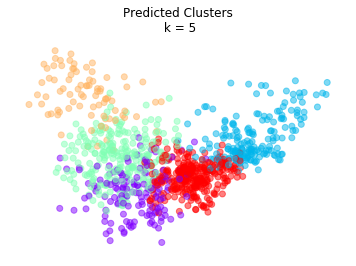

In [24]:

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))
plt.show()

In [67]:
targetDF['kmeans_predictions'] = exampleKM.labels_
targetDF

,Article Contents,Copyright Year,Journal Title,Titles,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,kmeans_predictions
0,The study of animal communication is a complex...,2011,PLoS ONE,UV-Deprived Coloration Reduces Success in Mate...,"[The, study, of, animal, communication, is, a,...",2239,"[studi, anim, commun, complex, scienc, address...",1055,2
1,Aneurysms in general represent a Damocles swor...,2017,PLOS ONE,Metabolomic profiling of ascending thoracic ao...,"[Aneurysms, in, general, represent, a, Damocle...",5547,"[aneurysm, gener, repres, damocl, sword, class...",2663,3
2,Prognostic information about life expectancy i...,2013,PLoS ONE,Predictive Value of a Profile of Routine Blood...,"[Prognostic, information, about, life, expecta...",4275,"[prognost, inform, life, expect, older, peopl,...",2011,2
3,Interleukin (IL)-23 has been associated with t...,2017,PLOS ONE,Continuous IL-23 stimulation drives ILC3 deple...,"[Interleukin, (, IL, ), -23, has, been, associ...",5091,"[interleukin, il, ha, associ, develop, sever, ...",2413,1
4,Labor represents a stress test for the fetus. ...,2014,PLoS ONE,Assessment of Coupling between Trans-Abdominal...,"[Labor, represents, a, stress, test, for, the,...",3149,"[labor, repres, stress, test, fetu, inde, feta...",1543,2
5,Competition has long been recognized as a crit...,2014,PLoS ONE,Seaweed-Coral Interactions: Variance in Seawee...,"[Competition, has, long, been, recognized, as,...",6629,"[competit, ha, long, recogn, critic, process, ...",3029,2
6,There were errors in the legend of Figure 11. ...,2012,PLoS ONE,Correction: The Zinc Dyshomeostasis Hypothesis...,"[There, were, errors, in, the, legend, of, Fig...",338,"[error, legend, figur, correct, figur, legend,...",169,2
7,Phylogeographic studies leverage spatial and g...,2017,PLOS Biology,A latitudinal phylogeographic diversity gradie...,"[Phylogeographic, studies, leverage, spatial, ...",11241,"[phylogeograph, studi, leverag, spatial, genet...",5706,2
8,Insulin-like Growth Factor-1 (IGF-1) is a pote...,2012,PLoS ONE,E-Peptides Control Bioavailability of IGF-1,"[Insulin-like, Growth, Factor-1, (, IGF-1, ), ...",5290,"[growth, potent, peptid, factor, involv, broad...",2492,0
9,Despite the expansive development of targeted ...,2014,PLoS ONE,Advancements in the Development of HIF-1α-Acti...,"[Despite, the, expansive, development, of, tar...",6722,"[despit, expans, develop, target, cancer, ther...",3053,0


## Hierarchical Clustering With Wald's Method
Here we must begin by calculating how similar the documents are to one another.

As a first pass, we take our matrix of word counts per document newsgroupsTFVects and create a word occurrence matrix measuring how similar the documents are to each other based on their number of shared words. (Note one could perform the converse operation, a document occurrence matrix measuring how similar words are to each other based on their number of collocated documents).

In [25]:
plosTFVects[:100].todense()

matrix([[0.        , 0.15644864, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.26894354,
         0.03860772],
        [0.        , 0.        , 0.02823103, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.02022338, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.01118371, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.20236336, ..., 0.        , 0.        ,
         0.        ]])

In [22]:
plosCoocMat = plosTFVects * plosTFVects.T
#set the diagonal to 0 since we don't care how similar texts are to themselves
plosCoocMat.setdiag(0)
#Another way of relating the texts is with their cosine similarity
#newsgroupsCosinMat1 = 1 - sklearn.metrics.pairwise.cosine_similarity(newsgroupsTFVects)
#But generally word occurrence is more accurate

ploslinkage_matrix = scipy.cluster.hierarchy.ward(plosCoocMat[:100, :100].toarray())

/software/Anaconda3-5.0.0.1-el7-x86_64/lib/python3.6/site-packages/scipy/sparse/compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)
/software/Anaconda3-5.0.0.1-el7-x86_64/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


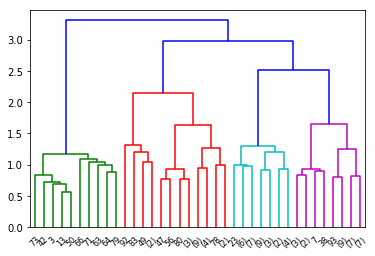

In [23]:
ax = scipy.cluster.hierarchy.dendrogram(ploslinkage_matrix, p=5, truncate_mode='level')

In [32]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(ploslinkage_matrix, 4, 'maxclust')
hierarchicalClusters

array([4, 2, 2, 1, 4, 4, 4, 4, 3, 3, 2, 4, 3, 1, 3, 4, 4, 2, 3, 2, 2, 4,
       2, 3, 4, 3, 4, 3, 4, 4, 2, 3, 3, 4, 4, 2, 3, 3, 4, 2, 2, 3, 1, 3,
       3, 3, 3, 2, 4, 2, 1, 3, 2, 2, 4, 3, 2, 3, 2, 3, 4, 3, 4, 1, 1, 3,
       1, 4, 3, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 1, 2, 4, 4, 2, 4, 4, 2, 3,
       3, 3, 4, 4, 2, 4, 4, 4, 4, 3, 2, 2], dtype=int32)

In [35]:
ploslinkage_matrix_full = scipy.cluster.hierarchy.ward(plosCoocMat.toarray())
plos_hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(ploslinkage_matrix_full, 4, 'maxclust')

/software/Anaconda3-5.0.0.1-el7-x86_64/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [37]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(plosCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(ploslinkage_matrix_full, 4, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(plos_df['Journal Title'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(plos_df['Journal Title'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(plos_df['Journal Title'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(plos_df['Journal Title'], hierarchicalClusters_full)))

/software/Anaconda3-5.0.0.1-el7-x86_64/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


For our complete clusters:
Homogeneity: 0.044
Completeness: 0.052
V-measure: 0.048
Adjusted Rand Score: 0.007


In [39]:
plos_df['wald_predictions'] = hierarchicalClusters_full
plos_df.to_pickle('../data/plos_wald_predictions.pk1') #saves
#plos_df


,Article Contents,Copyright Year,Journal Title,Titles,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,wald_predictions
0,The study of animal communication is a complex...,2011,PLoS ONE,UV-Deprived Coloration Reduces Success in Mate...,"[The, study, of, animal, communication, is, a,...",2239,"[studi, anim, commun, complex, scienc, address...",1055,4
1,Aneurysms in general represent a Damocles swor...,2017,PLOS ONE,Metabolomic profiling of ascending thoracic ao...,"[Aneurysms, in, general, represent, a, Damocle...",5547,"[aneurysm, gener, repres, damocl, sword, class...",2663,3
2,Prognostic information about life expectancy i...,2013,PLoS ONE,Predictive Value of a Profile of Routine Blood...,"[Prognostic, information, about, life, expecta...",4275,"[prognost, inform, life, expect, older, peopl,...",2011,4
3,Interleukin (IL)-23 has been associated with t...,2017,PLOS ONE,Continuous IL-23 stimulation drives ILC3 deple...,"[Interleukin, (, IL, ), -23, has, been, associ...",5091,"[interleukin, il, ha, associ, develop, sever, ...",2413,2
4,Labor represents a stress test for the fetus. ...,2014,PLoS ONE,Assessment of Coupling between Trans-Abdominal...,"[Labor, represents, a, stress, test, for, the,...",3149,"[labor, repres, stress, test, fetu, inde, feta...",1543,4
5,Competition has long been recognized as a crit...,2014,PLoS ONE,Seaweed-Coral Interactions: Variance in Seawee...,"[Competition, has, long, been, recognized, as,...",6629,"[competit, ha, long, recogn, critic, process, ...",3029,4
6,There were errors in the legend of Figure 11. ...,2012,PLoS ONE,Correction: The Zinc Dyshomeostasis Hypothesis...,"[There, were, errors, in, the, legend, of, Fig...",338,"[error, legend, figur, correct, figur, legend,...",169,4
7,Phylogeographic studies leverage spatial and g...,2017,PLOS Biology,A latitudinal phylogeographic diversity gradie...,"[Phylogeographic, studies, leverage, spatial, ...",11241,"[phylogeograph, studi, leverag, spatial, genet...",5706,4
8,Insulin-like Growth Factor-1 (IGF-1) is a pote...,2012,PLoS ONE,E-Peptides Control Bioavailability of IGF-1,"[Insulin-like, Growth, Factor-1, (, IGF-1, ), ...",5290,"[growth, potent, peptid, factor, involv, broad...",2492,2
9,Despite the expansive development of targeted ...,2014,PLoS ONE,Advancements in the Development of HIF-1α-Acti...,"[Despite, the, expansive, development, of, tar...",6722,"[despit, expans, develop, target, cancer, ther...",3053,1


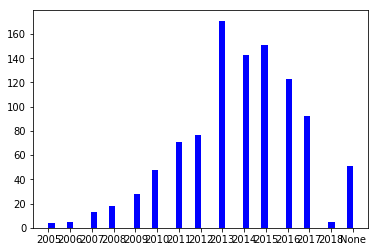

In [13]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
x = plos_df['Copyright Year']
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.05)
plt.show()

In [39]:
from collections import Counter


years = plos_df['Copyright Year']

Counter(years).keys() # equals to list(set(words))
Counter(years).values() # counts the elements' frequency

dict_values([71, 92, 171, 143, 77, 51, 123, 13, 48, 151, 28, 18, 5, 4, 5])

In [40]:
from collections import Counter


years = plos_df['Journal Title']

Counter(years).keys() # equals to list(set(words))
Counter(years).values() # counts the elements' frequency

dict_values([484, 341, 4, 17, 32, 11, 21, 10, 16, 18, 10, 9, 13, 13, 1])

# Gensim
Let's try some topic modeling with Gensim

In [40]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

plos_df['reduced_tokens'] = plos_df['normalized_tokens'].apply(lambda x: dropMissing(x, plosTFVectorizer.vocabulary_.keys()))

In [41]:
dictionary = gensim.corpora.Dictionary(plos_df['reduced_tokens'])

In [42]:
corpus = [dictionary.doc2bow(text) for text in plos_df['reduced_tokens']]

In [43]:
gensim.corpora.MmCorpus.serialize('plos.mm', corpus)
senmm = gensim.corpora.MmCorpus('plos.mm')

In [44]:
ploslda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [68]:
plos1Bow = dictionary.doc2bow(plos_df['reduced_tokens'][2])
plos1lda = ploslda[plos1Bow]
print("The topics of the text: {}".format(plos_df['Titles'][2]))
print("are: {}".format(plos1lda))

The topics of the text: Predictive Value of a Profile of Routine Blood Measurements on Mortality in Older Persons in the General Population: The Leiden 85-Plus Study
are: [(4, 0.08050804), (7, 0.91518426)]


In [50]:
ldaDF = pandas.DataFrame({
        'Title' : plos_df['Titles'],
        'topics' : [ploslda[dictionary.doc2bow(l)] for l in plos_df['reduced_tokens']]
    })

In [51]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(ploslda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(ploslda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,Title,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,Metabolomic profiling of ascending thoracic ao...,"[(2, 0.055428956), (3, 0.016166896), (4, 0.122...",0.000000,0.000000,0.055429,0.016167,0.122483,0.000000,0.000000,0.803877,0.000000,0.000000
101,Investigation of correlates of protection agai...,"[(3, 0.42242935), (4, 0.027456235), (5, 0.0515...",0.000000,0.000000,0.000000,0.422429,0.027456,0.051530,0.000000,0.495371,0.000000,0.000000
201,A New Method for Morphometric Analysis of Tiss...,"[(1, 0.018526431), (2, 0.3785779), (3, 0.48770...",0.000000,0.018526,0.378578,0.487701,0.112774,0.000000,0.000000,0.000000,0.000000,0.000000
301,Multinational Tagging Efforts Illustrate Regio...,"[(2, 0.465916), (3, 0.5068844), (5, 0.018506238)]",0.000000,0.000000,0.465916,0.506884,0.000000,0.018506,0.000000,0.000000,0.000000,0.000000
401,Brain Serotonin Signaling Does Not Determine S...,"[(0, 0.08457036), (6, 0.9097055)]",0.084570,0.000000,0.000000,0.000000,0.000000,0.000000,0.909706,0.000000,0.000000,0.000000
501,Osmostress Induces Autophosphorylation of Hog1...,"[(3, 0.04156689), (6, 0.95607775)]",0.000000,0.000000,0.000000,0.041567,0.000000,0.000000,0.956078,0.000000,0.000000,0.000000
601,"Feasibility, Acceptability, and Potential Effe...","[(4, 0.62976116), (5, 0.08836682), (7, 0.27709...",0.000000,0.000000,0.000000,0.000000,0.629761,0.088367,0.000000,0.277096,0.000000,0.000000
701,Adolescent Abstinence and Unprotected Sex in C...,"[(1, 0.017985005), (4, 0.15917012), (7, 0.1192...",0.000000,0.017985,0.000000,0.000000,0.159170,0.000000,0.000000,0.119251,0.094048,0.608194
801,Polymorphism in the Serotonin Receptor 2a (HTR...,"[(0, 0.06924329), (2, 0.2659565), (5, 0.021239...",0.069243,0.000000,0.265956,0.000000,0.000000,0.021239,0.000000,0.478505,0.000000,0.163210
901,Predicting Cognitive Function from Clinical Me...,"[(3, 0.0102504175), (4, 0.023523506), (5, 0.35...",0.000000,0.000000,0.000000,0.010250,0.023524,0.355350,0.000000,0.607742,0.000000,0.000000


In [52]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['Title']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.448817,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.176722,0.000000,0.36924
1,0.000000,0.0,0.055429,0.016167,0.122483,0.000000,0.000000,0.803877,0.000000,0.00000
2,0.000000,0.0,0.000000,0.000000,0.081015,0.000000,0.000000,0.914677,0.000000,0.00000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.069789,0.000000,0.927258,0.00000
4,0.086258,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.909713,0.000000,0.00000
5,0.000000,0.0,0.997190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.0,0.000000,0.965917,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.0,0.502631,0.000000,0.000000,0.495657,0.000000,0.000000,0.000000,0.00000
8,0.254688,0.0,0.000000,0.000000,0.000000,0.000000,0.730214,0.000000,0.012808,0.00000
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.997589,0.000000,0.000000,0.00000


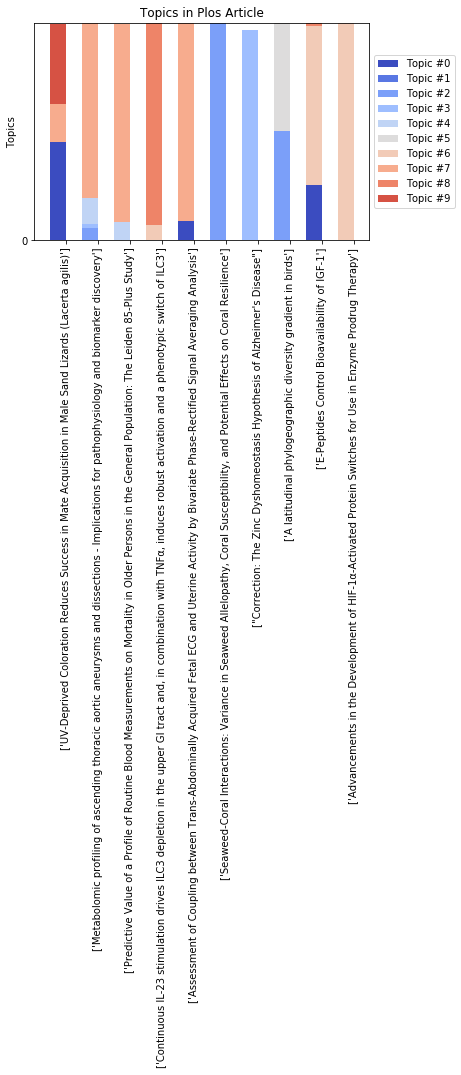

In [54]:
N = 10
ind = np.arange(N)
K = ploslda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Plos Article')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

In [62]:
ploslda.show_topic(1)

[('patient', 0.038666688),
 ('mice', 0.026816655),
 ('gene', 0.02341675),
 ('differ', 0.021691645),
 ('network', 0.0135456845),
 ('day', 0.011628386),
 ('cancer', 0.011478962),
 ('follow', 0.010482452),
 ('area', 0.010128541),
 ('transcript', 0.009818651)]

In [63]:
topicsDict = {}
for topicNum in range(ploslda.num_topics):
    topicWords = [w for w, p in ploslda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,gene,patient,differ,differ,patient,gene,mice,differ,differ,gene
1,mice,mice,gene,gene,differ,differ,dna,ha,mice,differ
2,signal,gene,ha,domain,ha,age,gene,patient,day,dna
3,differ,differ,report,area,cancer,ha,mutant,gene,gene,ha
4,ha,network,mice,patient,detect,plant,differ,subject,ha,signal
5,report,day,site,ha,water,site,day,report,patient,day
6,transcript,cancer,area,assay,base,read,wt,follow,follow,report
7,cancer,follow,snp,age,mm,transcript,ha,age,growth,transcript
8,follow,area,develop,follow,tumor,base,follow,detect,region,growth
9,detect,transcript,follow,target,year,respect,cancer,process,develop,region


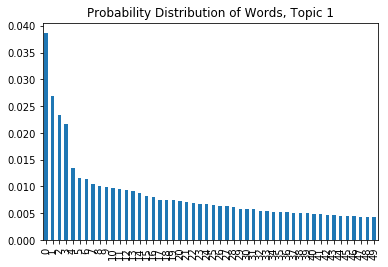

In [64]:
topic1_df = pandas.DataFrame(ploslda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [65]:
ploslda1 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.00001)
ploslda2 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.9)

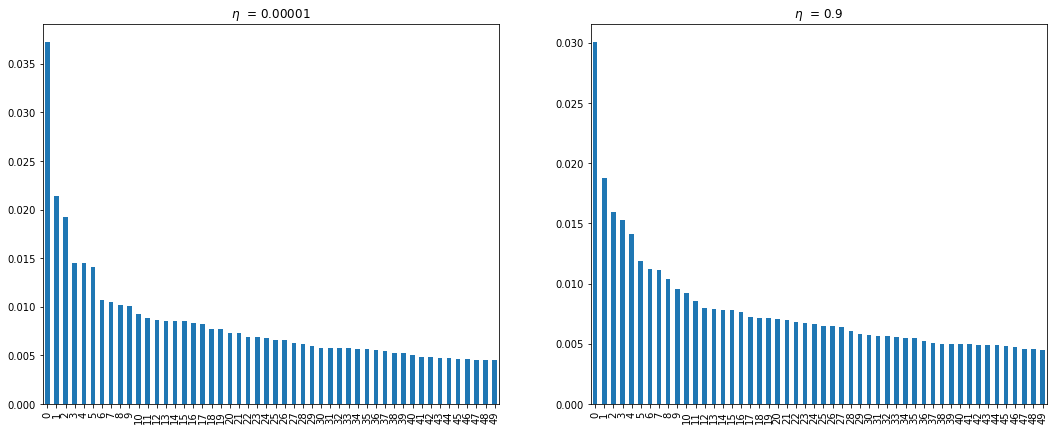

In [66]:
topic11_df = pandas.DataFrame(ploslda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(ploslda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

In [83]:
#Unique values in journal titles
#This for loop is an easy thing to find the unique values in a list
with open("journal_list.txt", "rb") as fp:
    journal_titles = pickle.load(fp)

output = []
for x in journal_titles:
    if x.lower() not in output:
        output.append(x.lower())

In [69]:
with open("journal_list.txt", "rb") as fp:
    journal_titles = pickle.load(fp)

In [84]:
print(output)

['plos one', 'plos biology', 'plos neglected tropical diseases', 'none', 'plos computational biology', 'plos pathogens', 'plos genetics', 'plos medicine']


In [2]:
with open("journal_list.txt", "rb") as fp:
    journal_titles = pickle.load(fp)